<a href="https://colab.research.google.com/github/Debjyotinath123/hello/blob/world/brain_tumor_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# brain-tumor-mri

Use the "Run" button to execute the code.

##System setup

In [1]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 5.3 MB/s 


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [2]:
import os
import opendatasets as od
import numpy as np

import torch
import torchvision
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import torchvision.transforms as tt
import jovian
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

##Downloading the dataset

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debjyotinath
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:04<00:00, 32.8MB/s]


I have downloaded the dataset from kaggle. It is dataset based MRI on brain and we have to detect which kind of tumor it is by examining the images.

In [4]:
train = '/content/brain-tumor-mri-dataset/Training'

In [5]:
test= '/content/brain-tumor-mri-dataset/Testing'

##Exploring the dataset

In [6]:
#print(os.listdir(data_dir))
classes = os.listdir(train)
print(classes)

['meningioma', 'notumor', 'pituitary', 'glioma']


There are 4 types of tumor in our dataset. The types are "notumor","pituitary", "meningioma" and "glioma".

In [7]:
glioma = os.listdir('/content/brain-tumor-mri-dataset/Training/glioma')
print('no of glioma images', len(glioma))

no of glioma images 1321


In [8]:
meningioma = os.listdir('/content/brain-tumor-mri-dataset/Training/meningioma')
print('no of meningloma images', len(meningioma))

no of meningloma images 1339


In [10]:
notumor = os.listdir('/content/brain-tumor-mri-dataset/Training/notumor')
print('no of notumor images', len(notumor))

no of notumor images 1595


In [11]:
pituitary = os.listdir('/content/brain-tumor-mri-dataset/Training/pituitary')
print('no of pituitary images', len(pituitary))

no of pituitary images 1457


In [12]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [13]:
dataset = ImageFolder(train, transform=ToTensor())

In [ ]:
def show_example(img, label):
  print('Label:', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Let's look at a couple of images from the datasets.

Label: glioma (0)


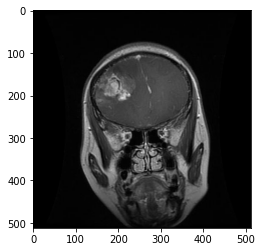

In [ ]:
show_example(*dataset[0])

Label: meningioma (1)


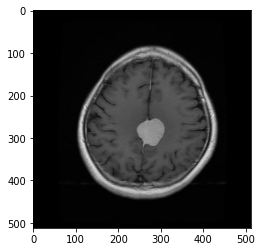

In [ ]:
show_example(*dataset[1376])

In [14]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 512, 512]) 0


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [17]:
img, label = dataset[2700]
print(img.shape, label)
img

torch.Size([3, 251, 236]) 2


tensor([[[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         ...,
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627]],

        [[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         ...,
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627]],

        [[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
         [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.

So every type of images of the dataset have different sizes, but to train the data we need have the same size. so we will convert all the images into same size.

In [18]:
train_tfms = tt.Compose([tt.Resize((256, 256)),
                         tt.RandomRotation(0),
                         tt.ToTensor(),
                         ])
test_tfms = tt.Compose([tt.Resize((256, 256)),
                        tt.ToTensor(),
                        ])

In [19]:
dataset = ImageFolder(train, transform = train_tfms)
test_dataset = ImageFolder(test, transform = test_tfms)

##Training and Validation Datasets

In [20]:
random_seed = 46
torch.manual_seed(random_seed);

In [23]:
len(dataset)

5712

There are total 5712 images in our train dataset.

In [24]:
val_size = 1000
train_size = len(dataset) - val_size

In [25]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(4712, 1000)

After spliting the train dataset into train_ds and val_ds we have 4712 images in train_ds and 1000 images in val_ds.

In [ ]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Dataset logged.


In [21]:
from torch.utils.data.dataloader import DataLoader

batch_size=50

In [26]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [27]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

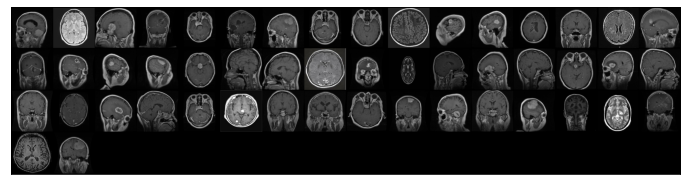

In [28]:
show_batch(train_dl)

##Defining the model(Convolutional Neural Network) 

In [30]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [31]:
class Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 32 x 32

            nn.Flatten(), 
            nn.Linear(256*32*32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 4))
        
    def forward(self, xb):
        return self.network(xb)

In [32]:
model = Model()
model

Model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=262144, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

In [33]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([50, 3, 256, 256])
out.shape: torch.Size([50, 4])


We have defined our model.

##Using GPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


##Training the Model

We will define two functions, fit and evaluate to train the model and evaluate its performance on the validation set.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(Model(), device)

In [ ]:
evaluate(model, val_dl)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'val_loss': 1.386063814163208, 'val_acc': 0.2709999680519104}

In our first training with the model we have 27% accuracy in our validation set which is quiet good as it is a random initialized model.

We will use some hyperparameters to train our model.

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Hyperparams logged.


In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.8192, val_loss: 0.5708, val_acc: 0.7750
Epoch [1], train_loss: 0.4972, val_loss: 0.4243, val_acc: 0.8460
Epoch [2], train_loss: 0.3407, val_loss: 0.3797, val_acc: 0.8610
Epoch [3], train_loss: 0.2219, val_loss: 0.2681, val_acc: 0.9100
Epoch [4], train_loss: 0.1416, val_loss: 0.2987, val_acc: 0.9180
Epoch [5], train_loss: 0.0915, val_loss: 0.2655, val_acc: 0.9370
Epoch [6], train_loss: 0.0554, val_loss: 0.3720, val_acc: 0.9310
Epoch [7], train_loss: 0.0505, val_loss: 0.3713, val_acc: 0.9380
Epoch [8], train_loss: 0.0825, val_loss: 0.2831, val_acc: 0.9200
Epoch [9], train_loss: 0.0421, val_loss: 0.3732, val_acc: 0.9280


From above records we can see that we have highest validation accuracy of 93.8 % which is really great.

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

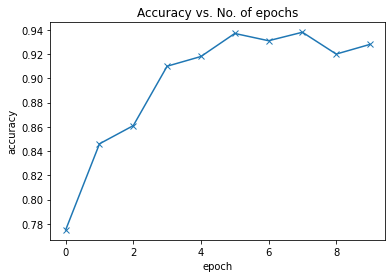

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 93.8%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 95% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

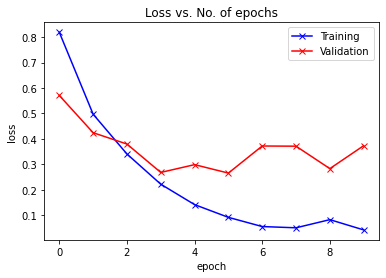

In [ ]:
plot_losses(history)

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point!

##Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. 

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: glioma , Predicted: glioma


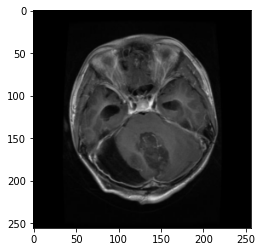

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: notumor , Predicted: notumor


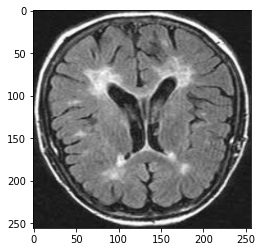

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.29451072216033936, 'val_acc': 0.9435715079307556}

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [ ]:
jovian.commit(project='Brain_Tumor_MRI')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


##Summary

In this project we trained one deep learning model to classify pictures from 4 classes:
0. 'glioma'
1. 'meningioma'
2. 'notumor'
3. 'pituitary'

The model was defined using convolution layers, linear layer and relu layers.

In [35]:
jovian.commit(project="Brain Tumor MRI")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
